# Fase 3
## Ian Galicia
## A01781528

Queremos crear una "ciudad" con distribución de personas diferente. Con $\bf{D}$ indicamos el "tamaño" de la ciudad y con $\bf{N}$ el número de personas de la ciudad.

In [1]:
N = 300  
D = 100  

La simulación se puede hacer en equipo, sólo en la primera actividad, donde se crea la "ciudad", cada miembro del equipo elige una ciudad diferente. Si el grupo está formado por más que 4 personas, dos personas pueden trabajar juntas.


### Ciudad cuadrada distribución uniforme


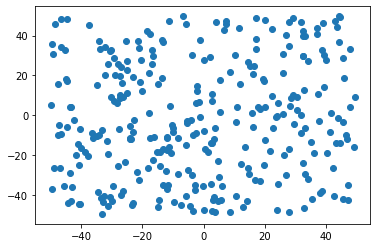

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

#### Crear los arrays xpos, ypos usando np.random.uniform() que representan las coordinadas (xpos,ypos) de las N personas
#### Pueden elegir los valores límite considerando que las N personas deben quedarse adentro de la ciudad

xpos = np.random.uniform(-D/2,D/2,N)
ypos = np.random.uniform(-D/2,D/2,N)

plt.scatter(xpos,ypos) #Plot para visualizar las personas

### Ciudad circular distribución uniforme

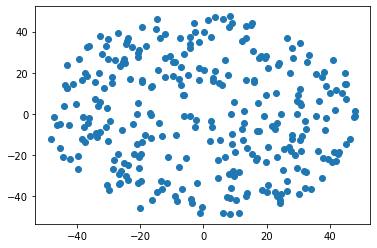

In [3]:
import math

def fcos(x):
    return math.cos(x)

def fsin(x):
    return math.sin(x)

R = D/2 #radio de la distribución

### Generar N valores aleatorios entre 0 y 1 con la función np.random.uniform() y multiplicarlos por 2*math.pi
### para generar valores aleatorios de ángulos entre 0 y 2*Pi
alpha = np.random.uniform(0,1,N)*2*math.pi
### Generar N valores del radio r como R*np.sqrt(d), donde d son N aleatorios entre 0 y 1 generados con np.random.uniform()
### Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
d = np.random.uniform(0,1,N)
r = R*np.sqrt(d)

xa = list(map(fcos,alpha))
ya = list(map(fsin,alpha))

### Convertir de coordenadas polares a cartesianas para generar las posiciones (xpos, ypos) de las N personas
xpos = r*np.array(xa)
ypos = r*np.array(ya)
plt.scatter(xpos,ypos)

## Ciudad cuadrada distribución en cluster


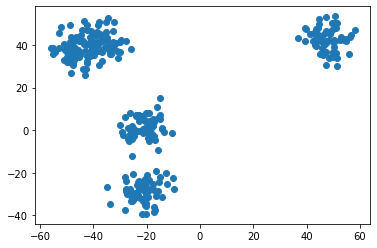

In [4]:
import math

n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

### Usando np.random.uniform() generar las coordenadas de centro (x0,y0) de cada cluster (en número igual a n_clusters)
### Usar como límites los límites de la ciudad
x0 = np.random.uniform(-D/2,D/2,n_clusters)
y0 = np.random.uniform(-D/2,D/2,n_clusters)


###Aquí abajo se crean los arrays vacíos para las posiciones (xpos,ypos) de las N personas
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
    xpos[i] = np.random.normal(x0[i], D/20, nn)
    ypos[i] = np.random.normal(y0[i], D/20, nn)

##En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

## Ciudad circular distribución en cluster

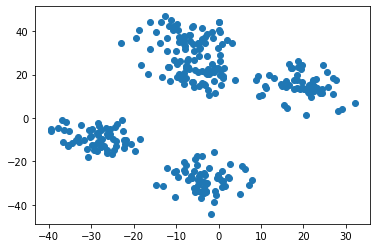

In [10]:
import math
n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

R = D/2
##Generar aleatorios con distribución uniforme entre 0 y 1 (en número igual a n_clusters) 
##para el ángulo de cada cluster usando np.random.uniform() y multiplicándolo por 2*math.pi
alpha = np.random.uniform(0,1,n_clusters)*2*math.pi

### Generar los radios r como R*np.sqrt(d), donde d son aleatorios con distribución uniforme (en número igual a n_clusters) entre 0 y 1
###Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.

d = np.random.uniform(0,1,n_clusters)
r = R * np.sqrt(np.random.uniform(0,1,n_clusters))

### Calcular las posiciones del centro de cada clusters convirtiendo de coordenadas polares a 

def fcos(x):
    return math.cos(x)

def fsin(x):
    return math.sin(x)

xa = list(map(fcos,alpha))
ya = list(map(fsin,alpha))

x0= r*np.array(xa)
y0 = r*np.array(ya)


### Se crean arrays para las posiciones
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
    xpos[i] = np.random.normal(x0[i], D/20, nn)
    ypos[i] = np.random.normal(y0[i], D/20, nn)
###En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.scatter(xpos,ypos)

# 

In [6]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 


#Condiciones iniciales:
I0  = 2 #número infectados inicial
R0 = 1 #número recuperados inicial
D0 = 1 #número muertos inicial
S0 = N-I0-D0-R0 #Número de susceptibles inicial

infection_radius = 0.6  #distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006
death_rate = 0.001

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

status = np.array(range(1,N+1))

print(status)

### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)

### Crear un array de N elementos que contenga valores de 1 a N
id = np.array(range(1,N+1))


[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [12]:
## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id

In [8]:
## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba

def infec(A,B):
    dist = math.sqrt((A[0]-B[0])**2+(A[1]-B[1])**2)
    v = False
    if dist < infection_radius:
        v = True
    return v


Bucle con iteraciones

In [9]:
dd = D0
n_iter = 100



https://plotly.com/python/discrete-color/